In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df
#This normalizes the data and makes it all pretty in a dataframe

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12041,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.985300e+07,1.985300e+07,False,NaN,1,None,None,None,2025-04-18T11:35:00.000Z,84546.165022,2.058902e+10,-20.5752,-0.059296,0.124791,2.757973,0.786428,-12.057273,-18.062457,1.678495e+12,63.0228,1.775469e+12,None,2025-04-18T11:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-18 17:07:31.185281
1,1027,Ethereum,ETH,ethereum,10137,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207006e+08,1.207006e+08,True,NaN,2,None,None,None,2025-04-18T11:35:00.000Z,1587.313572,1.063341e+10,-24.7641,0.046888,-0.349673,1.672630,-21.235447,-42.206764,-51.452490,1.915898e+11,7.1936,1.915898e+11,None,2025-04-18T11:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-18 17:07:31.185281
2,825,Tether USDt,USDT,tether,124643,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.447965e+11,1.480324e+11,True,NaN,3,None,None,None,2025-04-18T11:34:00.000Z,0.999801,4.460952e+10,-18.4905,-0.007293,0.001796,0.047581,-0.009134,-0.023380,0.031007,1.447676e+11,5.4359,1.480029e+11,None,2025-04-18T11:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-04-18 17:07:31.185281
3,52,XRP,XRP,xrp,1591,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.833814e+10,9.998625e+10,False,NaN,4,None,None,None,2025-04-18T11:35:00.000Z,2.071221,2.393729e+09,-19.9969,-0.317228,-1.280981,3.001191,-11.206134,-22.596095,-34.430120,1.208312e+11,4.5368,2.071221e+11,None,2025-04-18T11:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-18 17:07:31.185281
4,1839,BNB,BNB,bnb,2472,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408910e+08,1.408910e+08,False,NaN,5,None,None,None,2025-04-18T11:34:00.000Z,590.006895,1.454953e+09,2.4868,0.055145,0.658933,1.113606,-4.640254,-11.636552,-15.685792,8.312663e+10,3.1213,8.312663e+10,None,2025-04-18T11:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-18 17:07:31.185281
5,5426,Solana,SOL,solana,899,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.163738e+08,5.987277e+08,True,NaN,6,None,None,None,2025-04-18T11:35:00.000Z,133.762306,3.027796e+09,-34.4063,-0.528401,0.581767,13.221425,3.898119,-27.306220,-44.101252,6.907136e+10,2.5937,8.008720e+10,None,2025-04-18T11:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-18 17:07:31.185281
6,3408,USDC,USDC,usd-coin,27199,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.087722e+10,6.087722e+10,False,NaN,7,None,None,None,2025-04-18T11:35:00.000Z,0.999873,7.115420e+09,-29.4975,-0.004566,-0.008597,0.005594,-0.001666,-0.027087,-0.013733,6.086947e+10,2.2855,6.086947e+10,None,2025-04-18T11:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-04-18 17:07:31.185281
7,1958,TRON,TRX,tron,1164,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.495017e+10,9.495019e+10,True,NaN,8,None,None,None,2025-04-18T11:35:00.000Z,0.244965,4.920288e+08,-31.2288,0.065653,-1.238375,3.344558,6.213231,-0.580125,1.837610,2.325947e+10,0.8733,2.325947e+10,None,2025-04-18T11:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-18 17:07:31.185281
8,74,Dogecoin,DOGE,dogecoin,1205,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange,

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
      # create a csv and append data to it

In [8]:
import os
from time import sleep

def api_runner():
    # Your API logic here
    print("Calling the API...")

# Run the loop 333 times
for i in range(333):
    print(f'Iteration {i+1}/333:')
    api_runner()
    print('API Runner completed\n')
    sleep(60)  # Wait for 1 minute

print("All iterations complete.")

Iteration 1/333:
Calling the API...
API Runner completed

Iteration 2/333:
Calling the API...
API Runner completed

Iteration 3/333:
Calling the API...
API Runner completed

Iteration 4/333:
Calling the API...
API Runner completed

Iteration 5/333:
Calling the API...
API Runner completed

Iteration 6/333:
Calling the API...
API Runner completed

Iteration 7/333:
Calling the API...
API Runner completed

Iteration 8/333:
Calling the API...
API Runner completed

Iteration 9/333:
Calling the API...
API Runner completed

Iteration 10/333:
Calling the API...
API Runner completed

Iteration 11/333:
Calling the API...
API Runner completed

Iteration 12/333:
Calling the API...
API Runner completed

Iteration 13/333:
Calling the API...
API Runner completed

Iteration 14/333:
Calling the API...
API Runner completed

Iteration 15/333:
Calling the API...
API Runner completed

Iteration 16/333:
Calling the API...
API Runner completed

Iteration 17/333:
Calling the API...
API Runner completed

Iterat

KeyboardInterrupt: 

In [10]:
import os
import pandas as pd

# Assuming df is your DataFrame and it's already defined

file_path = r'E:\data analytics\crypto\API.csv'

if not os.path.isfile(file_path):
    # Write the CSV with header on first creation
    df.to_csv(file_path, index=False)
else:
    # Append to the file without writing headers again
    df.to_csv(file_path, mode='a', header=False, index=False)

In [11]:
df72 = pd.read_csv(r'E:\data analytics\crypto\API.csv')
df72

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12041,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.985300e+07,1.985300e+07,False,NaN,1,NaN,NaN,NaN,2025-04-18T11:35:00.000Z,84546.165022,2.058902e+10,-20.5752,-0.059296,0.124791,2.757973,0.786428,-12.057273,-18.062457,1.678495e+12,63.0228,1.775469e+12,NaN,2025-04-18T11:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-18 17:07:31.185281
1,1027,Ethereum,ETH,ethereum,10137,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.207006e+08,1.207006e+08,True,NaN,2,NaN,NaN,NaN,2025-04-18T11:35:00.000Z,1587.313572,1.063341e+10,-24.7641,0.046888,-0.349673,1.672630,-21.235447,-42.206764,-51.452490,1.915898e+11,7.1936,1.915898e+11,NaN,2025-04-18T11:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-18 17:07:31.185281
2,825,Tether USDt,USDT,tether,124643,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.447965e+11,1.480324e+11,True,NaN,3,NaN,NaN,NaN,2025-04-18T11:34:00.000Z,0.999801,4.460952e+10,-18.4905,-0.007293,0.001796,0.047581,-0.009134,-0.023380,0.031007,1.447676e+11,5.4359,1.480029e+11,NaN,2025-04-18T11:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-04-18 17:07:31.185281
3,52,XRP,XRP,xrp,1591,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.833814e+10,9.998625e+10,False,NaN,4,NaN,NaN,NaN,2025-04-18T11:35:00.000Z,2.071221,2.393729e+09,-19.9969,-0.317228,-1.280981,3.001191,-11.206134,-22.596095,-34.430120,1.208312e+11,4.5368,2.071221e+11,NaN,2025-04-18T11:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-18 17:07:31.185281
4,1839,BNB,BNB,bnb,2472,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.408910e+08,1.408910e+08,False,NaN,5,NaN,NaN,NaN,2025-04-18T11:34:00.000Z,590.006895,1.454953e+09,2.4868,0.055145,0.658933,1.113606,-4.640254,-11.636552,-15.685792,8.312663e+10,3.1213,8.312663e+10,NaN,2025-04-18T11:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-18 17:07:31.185281
5,5426,Solana,SOL,solana,899,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.163738e+08,5.987277e+08,True,NaN,6,NaN,NaN,NaN,2025-04-18T11:35:00.000Z,133.762306,3.027796e+09,-34.4063,-0.528401,0.581767,13.221425,3.898119,-27.306220,-44.101252,6.907136e+10,2.5937,8.008720e+10,NaN,2025-04-18T11:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-18 17:07:31.185281
6,3408,USDC,USDC,usd-coin,27199,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,6.087722e+10,6.087722e+10,False,NaN,7,NaN,NaN,NaN,2025-04-18T11:35:00.000Z,0.999873,7.115420e+09,-29.4975,-0.004566,-0.008597,0.005594,-0.001666,-0.027087,-0.013733,6.086947e+10,2.2855,6.086947e+10,NaN,2025-04-18T11:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-04-18 17:07:31.185281
7,1958,TRON,TRX,tron,1164,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,9.495017e+10,9.495019e+10,True,NaN,8,NaN,NaN,NaN,2025-04-18T11:35:00.000Z,0.244965,4.920288e+08,-31.2288,0.065653,-1.238375,3.344558,6.213231,-0.580125,1.837610,2.325947e+10,0.8733,2.325947e+10,NaN,2025-04-18T11:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-18 17:07:31.185281
8,74,Dogecoin,DOGE,dogecoin,1205,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.489027e+11,1.48902

In [12]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [13]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12041,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19853000.00000,19853000.00000,False,NaN,1,None,None,None,2025-04-18T11:35:00.000Z,84546.16502,20589019807.88321,-20.57520,-0.05930,0.12479,2.75797,0.78643,-12.05727,-18.06246,1678495014177.02295,63.02280,1775469465456.97998,None,2025-04-18T11:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-18 17:07:31.185281
1,1027,Ethereum,ETH,ethereum,10137,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120700644.75363,120700644.75363,True,NaN,2,None,None,None,2025-04-18T11:35:00.000Z,1587.31357,10633411624.19605,-24.76410,0.04689,-0.34967,1.67263,-21.23545,-42.20676,-51.45249,191589771618.74167,7.19360,191589771618.73999,None,2025-04-18T11:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-18 17:07:31.185281
2,825,Tether USDt,USDT,tether,124643,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,144796521706.92477,148032435824.98291,True,NaN,3,None,None,None,2025-04-18T11:34:00.000Z,0.99980,44609524621.49676,-18.49050,-0.00729,0.00180,0.04758,-0.00913,-0.02338,0.03101,144767636559.18619,5.43590,148002905151.67001,None,2025-04-18T11:34:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-04-18 17:07:31.185281
3,52,XRP,XRP,xrp,1591,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,58338141684.00000,99986253154.00000,False,NaN,4,None,None,None,2025-04-18T11:35:00.000Z,2.07122,2393729482.85430,-19.99690,-0.31723,-1.28098,3.00119,-11.20613,-22.59609,-34.43012,120831158459.08069,4.53680,207122055950.26999,None,2025-04-18T11:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-18 17:07:31.185281
4,1839,BNB,BNB,bnb,2472,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,140890954.99000,140890954.99000,False,NaN,5,None,None,None,2025-04-18T11:34:00.000Z,590.00690,1454952955.39021,2.48680,0.05515,0.65893,1.11361,-4.64025,-11.63655,-15.68579,83126634900.71907,3.12130,83126634900.72000,None,2025-04-18T11:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-18 17:07:31.185281
5,5426,Solana,SOL,solana,899,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,516373839.70034,598727710.28781,True,NaN,6,None,None,None,2025-04-18T11:35:00.000Z,133.76231,3027796479.11912,-34.40630,-0.52840,0.58177,13.22142,3.89812,-27.30622,-44.10125,69071355784.26114,2.59370,80087199458.41000,None,2025-04-18T11:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-18 17:07:31.185281
6,3408,USDC,USDC,usd-coin,27199,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,60877215289.98827,60877215289.98827,False,NaN,7,None,None,None,2025-04-18T11:35:00.000Z,0.99987,7115420168.17347,-29.49750,-0.00457,-0.00860,0.00559,-0.00167,-0.02709,-0.01373,60869469265.87301,2.28550,60869469265.87000,None,2025-04-18T11:35:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-04-18 17:07:31.185281
7,1958,TRON,TRX,tron,1164,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94950169572.02580,94950190955.72879,True,NaN,8,None,None,None,2025-04-18T11:35:00.000Z,0.24497,492028817.30954,-31.22880,0.06565,-1.23837,3.34456,6.21323,-0.58013,1.83761,23259468397.95562,0.87330,23259473636.21000,None,2025-04-18

In [14]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.05930,0.12479,2.75797,0.78643,-12.05727,-18.06246
Ethereum,0.04689,-0.34967,1.67263,-21.23545,-42.20676,-51.45249
Tether USDt,-0.00729,0.00180,0.04758,-0.00913,-0.02338,0.03101
XRP,-0.31723,-1.28098,3.00119,-11.20613,-22.59609,-34.43012
BNB,0.05515,0.65893,1.11361,-4.64025,-11.63655,-15.68579
Solana,-0.52840,0.58177,13.22142,3.89812,-27.30622,-44.10125
USDC,-0.00457,-0.00860,0.00559,-0.00167,-0.02709,-0.01373
TRON,0.06565,-1.23837,3.34456,6.21323,-0.58013,1.83761
Dogecoin,-0.23291,-1.01393,-1.79946,-9.09500,-41.07968,-61.01575


In [15]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.05930
              quote.USD.percent_change_24h     0.12479
              quote.USD.percent_change_7d      2.75797
              quote.USD.percent_change_30d     0.78643
              quote.USD.percent_change_60d   -12.05727
              quote.USD.percent_change_90d   -18.06246
Ethereum      quote.USD.percent_change_1h      0.04689
              quote.USD.percent_change_24h    -0.34967
              quote.USD.percent_change_7d      1.67263
              quote.USD.percent_change_30d   -21.23545
              quote.USD.percent_change_60d   -42.20676
              quote.USD.percent_change_90d   -51.45249
Tether USDt   quote.USD.percent_change_1h     -0.00729
              quote.USD.percent_change_24h     0.00180
              quote.USD.percent_change_7d      0.04758
              quote.USD.percent_change_30d    -0.00913
              quote.USD.percent_change_60d    -0.02338
              quote.US

In [16]:
type(df4)

pandas.core.series.Series

In [17]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.05930
             quote.USD.percent_change_24h   0.12479
             quote.USD.percent_change_7d    2.75797
             quote.USD.percent_change_30d   0.78643
             quote.USD.percent_change_60d -12.05727
             quote.USD.percent_change_90d -18.06246
Ethereum     quote.USD.percent_change_1h    0.04689
             quote.USD.percent_change_24h  -0.34967
             quote.USD.percent_change_7d    1.67263
             quote.USD.percent_change_30d -21.23545
             quote.USD.percent_change_60d -42.20676
             quote.USD.percent_change_90d -51.45249
Tether USDt  quote.USD.percent_change_1h   -0.00729
             quote.USD.percent_change_24h   0.00180
             quote.USD.percent_change_7d    0.04758
             quote.USD.percent_change_30d  -0.00913
             quote.USD.percent_change_60d  -0.02338
             quote.USD.percent_change_90d   0.03101
XRP          quote.USD.percent_change_1h   -0.31723
             quote.USD.percent_change_24h  -1.28098
             quote.USD.percent_change_7d    3.00119
             quote.USD.percent_change_30d -11.20613
             quote.USD.percent_change_60d -22.59609
             quote.USD.percent_change_90d -34.43012
BNB          quote.USD.percent_change_1h    0.05515
             quote.USD.percent_change_24h   0.65893
             quote.USD.percent_change_7d    1.11361
             quote.USD.percent_change_30d  -4.64025
             quote.USD.percent_change_60d -11.63655
             quote.USD.percent_change_90d -15.68579
Solana       quote.USD.percent_change_1h   -0.52840
             quote.USD.percent_change_24h   0.58177
             quote.USD.percent_change_7d   13.22142
             quote.USD.percent_change_30d   3.89812
             quote.USD.percent_change_60d -27.30622
             quote.USD.percent_change_90d -44.10125
USDC         quote.USD.percent_change_1h   -0.00457
             quote.USD.percent_change_24h  -0.00860
             quote.USD.percent_change_7d    0.00559
             quote.USD.percent_change_30d  -0.00167
             quote.USD.percent_change_60d  -0.02709
             quote.USD.percent_change_90d  -0.01373
TRON         quote.USD.percent_change_1h    0.06565
             quote.USD.percent_change_24h  -1.23837
             quote.USD.percent_change_7d    3.34456
             quote.USD.percent_change_30d   6.21323
             quote.USD.percent_change_60d  -0.58013
             quote.USD.percent_change_90d   1.83761
Dogecoin     quote.USD.percent_change_1h   -0.23291
             quote.USD.percent_change_24h  -1.01393
             quote.USD.percent_change_7d   -1.79946
             quote.USD.percent_change_30d  -9.09500
             quote.USD.percent_change_60d -41.07968
             quote.USD.percent_change_90d -61.01575
Cardano      quote.USD.percent_change_1h    0.04807
             quote.USD.percent_change_24h  -0.49357
             quote.USD.percent_change_7d   -1.85012
             quote.USD.percent_change_30d -15.22424
             quote.USD.percent_change_60d -23.63191
             quote.USD.percent_change_90d -42.37892
UNUS SED LEO quote.USD.percent_change_1h    0.00298
             quote.USD.percent_change_24h  -3.34468
             quote.USD.percent_change_7d   -2.83694
             quote.USD.percent_change_30d  -6.81254
             quote.USD.percent_change_60d  -6.60825
             quote.USD.percent_change_90d  -6.30207
Chainlink    quote.USD.percent_change_1h   -0.19002
             quote.USD.percent_change_24h   1.51217
             quote.USD.percent_change_7d    1.00230
             quote.USD.percent_change_30d -12.34728
             quote.USD.percent_change_60d -34.84389
             quote.USD.percent_change_90d -47.67714
Avalanche    quote.USD.percent_change_1h   -0.30851
             quote.USD.percent_change_24h  -1.19645
             quote.USD.percent_change_7d    1.49815
             quote.USD.percent_change_30d

In [18]:
df5.count()

values    90
dtype: int64

In [19]:
index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.05930
1,Bitcoin,quote.USD.percent_change_24h,0.12479
2,Bitcoin,quote.USD.percent_change_7d,2.75797
3,Bitcoin,quote.USD.percent_change_30d,0.78643
4,Bitcoin,quote.USD.percent_change_60d,-12.05727
5,Bitcoin,quote.USD.percent_change_90d,-18.06246
6,Ethereum,quote.USD.percent_change_1h,0.04689
7,Ethereum,quote.USD.percent_change_24h,-0.34967
8,Ethereum,quote.USD.percent_change_7d,1.67263
9,Ethereum,quote.USD.percent_change_30d,-21.23545


In [20]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.05930
1,Bitcoin,quote.USD.percent_change_24h,0.12479
2,Bitcoin,quote.USD.percent_change_7d,2.75797
3,Bitcoin,quote.USD.percent_change_30d,0.78643
4,Bitcoin,quote.USD.percent_change_60d,-12.05727
5,Bitcoin,quote.USD.percent_change_90d,-18.06246
6,Ethereum,quote.USD.percent_change_1h,0.04689
7,Ethereum,quote.USD.percent_change_24h,-0.34967
8,Ethereum,quote.USD.percent_change_7d,1.67263
9,Ethereum,quote.USD.percent_change_30d,-21.23545


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\shrey\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


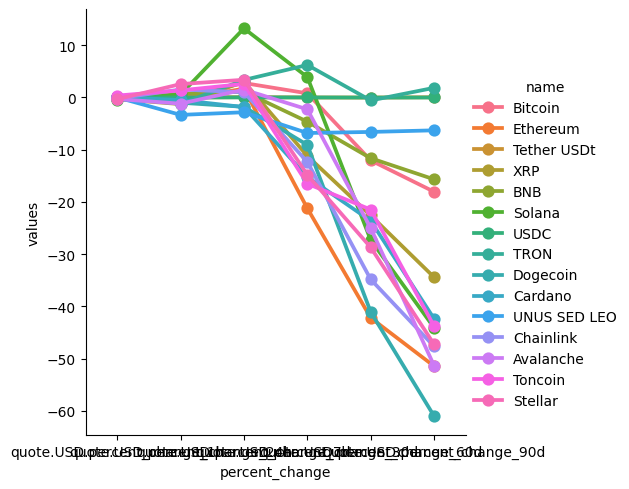

In [22]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [23]:
#create a dataframe with the columns we want

#df10 = df[['name','quote.USD.price','timestamp']]
#df10 = df10.query("name == 'Bitcoin'")
#df10

,name,quote.USD.price,timestamp
0,Bitcoin,84546.16502,2025-04-18 17:07:31.185281


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

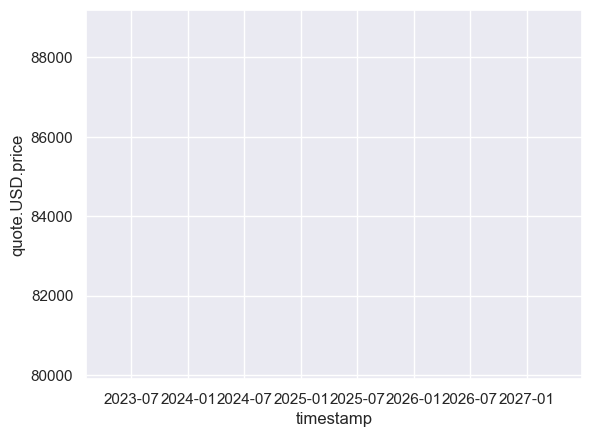

In [25]:
import pandas as pd
from datetime import datetime, timedelta

# Create sample data
data = {
    'name': ['Bitcoin'] * 5,
    'quote.USD.price': [84000, 84200, 84400, 84500, 84546],
    'timestamp': [datetime.now() - timedelta(minutes=i*5) for i in range(5)]
}

df10 = pd.DataFrame(data)
print(df10)


      name  quote.USD.price                  timestamp
0  Bitcoin            84000 2025-04-18 18:01:31.546727
1  Bitcoin            84200 2025-04-18 17:56:31.546727
2  Bitcoin            84400 2025-04-18 17:51:31.546727
3  Bitcoin            84500 2025-04-18 17:46:31.546727
4  Bitcoin            84546 2025-04-18 17:41:31.546727


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

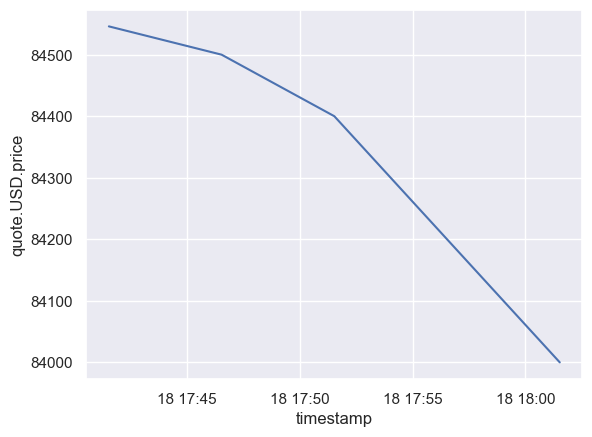

In [26]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)